# SpringBoard Capstone2: Direct Marketing
Unit18: Modeling

    Data from Kaggle.com: https://www.kaggle.com/c/bankdirectmarketing/data



In [1]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
market_pre = pd.read_csv('/Users/Ling/Desktop/01_Springboard/DirectMarketing/Data/train.csv', index_col = 0)
print(market_pre.head())

          age           job   marital            education  default housing  \
RecordID                                                                      
13783      49        admin.  divorced  professional.course       no     yes   
23986      52      services   married          high.school  unknown     yes   
20663      46   blue-collar  divorced             basic.9y       no      no   
13958      26  entrepreneur    single          high.school      yes     yes   
28184      47        admin.    single    university.degree       no      no   

         loan   contact month day_of_week  ...  campaign  pdays  previous  \
RecordID                                   ...                              
13783     yes  cellular   aug         mon  ...         1    115         2   
23986      no  cellular   may         mon  ...         1    402         2   
20663      no  cellular   apr         wed  ...         1    999         1   
13958     yes  cellular   aug         fri  ...        28    9

In [3]:
market_test = pd.read_csv('/Users/Ling/Desktop/01_Springboard/DirectMarketing/Data/test.csv', index_col = 0)
print(market_test.head())

          age          job  marital            education default housing loan  \
RecordID                                                                        
14664      37   technician   single  professional.course      no     yes  yes   
25250      26       admin.   single          high.school      no     yes   no   
4070       42  blue-collar  married             basic.6y      no      no   no   
19446      38  blue-collar  married             basic.9y      no     yes   no   
5111       43  blue-collar  married             basic.4y      no     yes   no   

            contact month day_of_week  duration  campaign  pdays  previous  \
RecordID                                                                     
14664      cellular   aug         mon      3309         1    471         0   
25250      cellular   may         thu      2757         2    159         2   
4070      telephone   may         mon       266         3    999         0   
19446     telephone   nov         thu     

In [4]:
cat = market_pre[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
market_cat = pd.get_dummies(cat,drop_first = True)

In [5]:
test_cat_pre = market_test[['job', 'marital', 'education', 'default', 'housing', \
 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
test_cat = pd.get_dummies(test_cat_pre,drop_first = True)

In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', \
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
market_num = market_pre[num]
market_all = market_cat.join(market_num)
market_all.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
13783,0,0,0,0,0,0,0,0,0,0,...,49,4457,1,115,2,1.4,92.479703,-35.498996,0.705058,4990.198481
23986,0,0,0,0,0,0,1,0,0,0,...,52,4797,1,402,2,-1.8,93.439161,-39.331320,4.245479,5144.563621
20663,1,0,0,0,0,0,0,0,0,0,...,46,169,1,999,1,-1.8,93.075000,-47.100000,1.445000,5099.100000
13958,0,1,0,0,0,0,0,0,0,0,...,26,376,28,999,0,1.4,93.444000,-36.100000,4.967000,5228.100000
28184,0,0,0,0,0,0,0,0,0,0,...,47,3033,1,252,4,-3.4,94.352376,-33.073620,1.208702,5025.420036


In [7]:
test_num = market_test[num]
X_test = test_cat.join(test_num)
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
RecordID,,,,,,,,,,,,,,,,,,,,,
14664,0,0,0,0,0,0,0,0,1,0,...,37,3309,1,471,0,1.4,92.325519,-33.010270,3.562675,5028.544435
25250,0,0,0,0,0,0,0,0,0,0,...,26,2757,2,159,2,-1.8,92.591695,-46.129934,3.294182,5025.294022
4070,1,0,0,0,0,0,0,0,0,0,...,42,266,3,999,0,1.1,93.994000,-36.400000,4.857000,5191.000000
19446,1,0,0,0,0,0,0,0,0,0,...,38,29,1,433,5,-0.1,92.752588,-41.837090,3.318768,5111.327469
5111,1,0,0,0,0,0,0,0,0,0,...,43,1684,2,938,3,1.1,93.983679,-35.267269,3.833161,5183.822823


In [8]:
X = market_all
y = market_pre['subscribe']
over = SMOTE(sampling_strategy=0.9)
X, y = over.fit_resample(X, y)
counter = Counter(y)

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled=scaler.transform(X)
X_test_scaled=scaler.transform(X_test)
X_scaled[0:1]

RF = RandomForestClassifier(n_estimators=1400,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'auto',
 max_depth = 50,
 bootstrap = False)
RF.fit(X,y)
y_pred = RF.predict(X_test)

In [11]:
market_test['subscribe'] = y_pred
market_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
RecordID,,,,,,,,,,,,,,,,,,,,,
14664,37,technician,single,professional.course,no,yes,yes,cellular,aug,mon,...,1,471,0,success,1.4,92.325519,-33.010270,3.562675,5028.544435,no
25250,26,admin.,single,high.school,no,yes,no,cellular,may,thu,...,2,159,2,success,-1.8,92.591695,-46.129934,3.294182,5025.294022,no
4070,42,blue-collar,married,basic.6y,no,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994000,-36.400000,4.857000,5191.000000,no
19446,38,blue-collar,married,basic.9y,no,yes,no,telephone,nov,thu,...,1,433,5,success,-0.1,92.752588,-41.837090,3.318768,5111.327469,no
5111,43,blue-collar,married,basic.4y,no,yes,no,telephone,may,thu,...,2,938,3,success,1.1,93.983679,-35.267269,3.833161,5183.822823,no


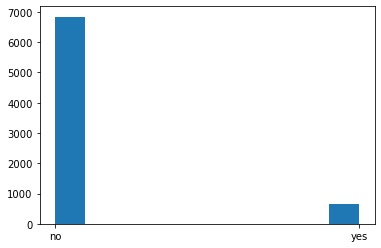

In [12]:
plt.hist(y_pred)
plt.show()

In [13]:
market_test.to_csv("test_result.csv")